**Here are the Visualization We’ll Design using matplotlib**

Bar Graph

Box Plot

Histogram

Line Chart and Subplots

Scatter Plot
 
Pie Chart

Violin Chart

**We will be analyzing the Food Demand Forecasting project using  matplotlib library**

Let us first import the relevant libraries:

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [ ]:
df_meal = pd.read_csv('/content/sample_data/meal_info.csv') 
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
df_center = pd.read_csv('/content/sample_data/fulfilment_center_info.csv') 
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [ ]:
df_food = pd.read_csv('/content/sample_data/train.csv') 
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
df = pd.merge(df_food,df_center,on='center_id') 
df = pd.merge(df,df_meal,on='meal_id')

In [ ]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


1. Bar Graph using matplotlib


First, we want to find the most popular food item that customers have bought from the company.

I will be using the Pandas pivot_table function to find the total number of orders for each category of the food item:

In [ ]:
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


Next, I will try to visualize this using a bar graph.

Bar graphs are best used when we need to compare the quantity of categorical values within the same category.

Bar graph is generated using plt.bar() in matplotlib:

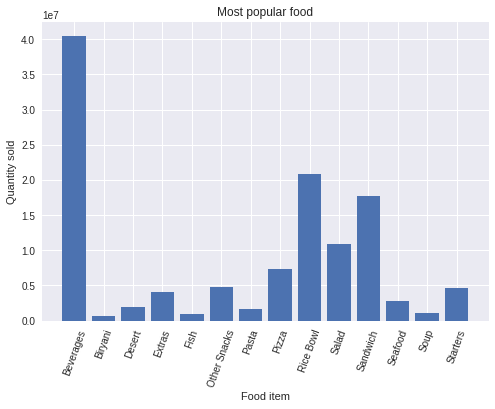

In [ ]:
#bar graph
plt.bar(table.index,table['num_orders'])

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Food item') 

#y-axis labels 
plt.ylabel('Quantity sold') 

#plot title 
plt.title('Most popular food') 

#save plot 
plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_6.png',dpi=300,bbox_inches='tight') 

#display 
plt.show();

**2. Box Plot using matplotlib**

Box plot gives statistical information about the distribution of numeric data divided into different groups. It is useful for detecting outliers within each group.



The lower, middle and upper part of the box represents the 25th, 50th, and 75th percentile values respectively

The top whisker represents Q3+1.5*IQR

The bottom whisker represents Q1-1.5*IQR

Outliers are shown as scatter points

Shows skewness in the data

In [ ]:
#dictionary for base price per cuisine
c_price = {}
for i in df['cuisine'].unique():
    c_price[i] = df[df['cuisine']==i].base_price

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


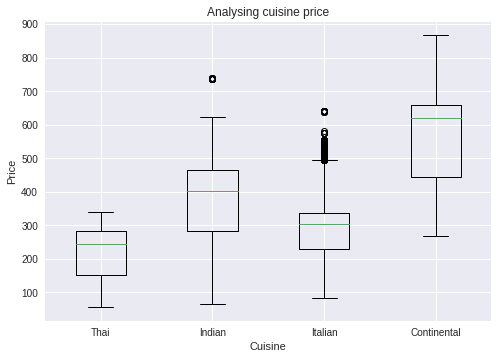

In [ ]:
#plotting boxplot 
plt.boxplot([x for x in c_price.values()],labels=[x for x in c_price.keys()]) 

#x and y-axis labels 
plt.xlabel('Cuisine') 
plt.ylabel('Price') 

#plot title 
plt.title('Analysing cuisine price') 

#save and display 
# plt.savefig('C:\\Users\\Dell\\Desktop\\matplotlib_plotting_9.png',dpi=300,bbox_inches='tight') 
plt.show();

**3. Histogram using matplotlib**

A histogram shows the distribution of numeric data through a continuous interval by segmenting data into different bins. Useful for inspecting skewness in the data.

Since base_price is a continuous variable, we will inspect its range in different distinct orders using a histogram. We can do this using plt.hist().

But the confusing part is what should be the number of bins? By default, it is 10. However, there is no correct answer and you can vary it according to your dataset to best visualize it.

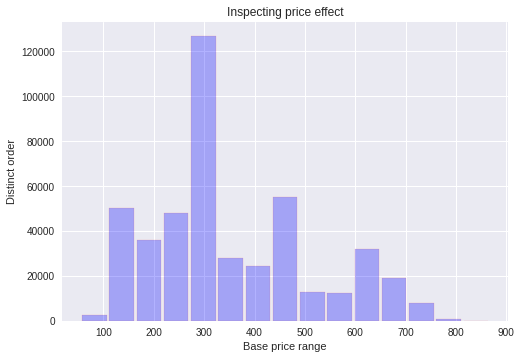

In [ ]:
#plotting histogram 
plt.hist(df['base_price'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('Base price range') 
plt.ylabel('Distinct order') 

#plot title 
plt.title('Inspecting price effect') 

#save and display the plot 
#plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_10.png',dpi=300,bbox_inches='tight') 
plt.show();

**Following example plots a histogram of marks obtained by students in a class. Four bins, 0-25, 26-50, 51-75, and 76-100 are defined. The Histogram shows number of students falling in this range.**

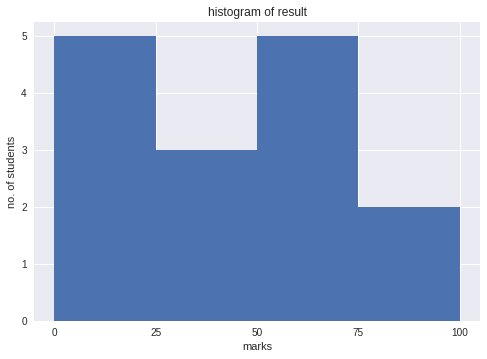

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots(1,1)
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27])
ax.hist(a, bins = [0,25,50,75,100])
ax.set_title("histogram of result")
ax.set_xticks([0,25,50,75,100])
ax.set_xlabel('marks')
ax.set_ylabel('no. of students')
plt.show()

**Line Plot and Subplots using matplotlib**

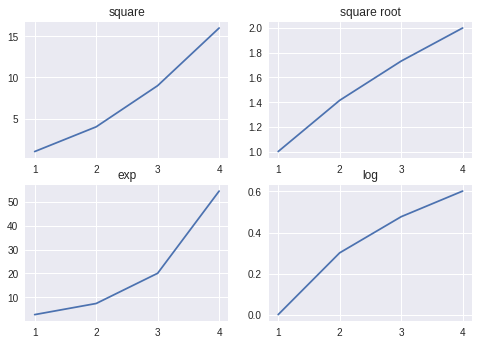

In [ ]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2)
import numpy as np
x = np.arange(1,5)
a[0][0].plot(x,x*x)
a[0][0].set_title('square')
a[0][1].plot(x,np.sqrt(x))
a[0][1].set_title('square root')
a[1][0].plot(x,np.exp(x))
a[1][0].set_title('exp')
a[1][1].plot(x,np.log10(x))
a[1][1].set_title('log')
plt.show()

**Pie Chart**

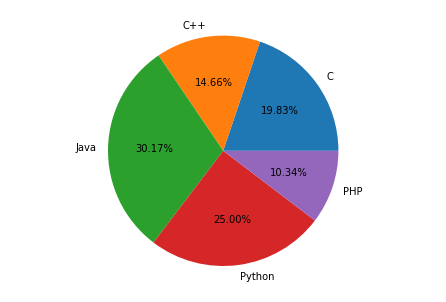

In [1]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

**Scatter Plot**

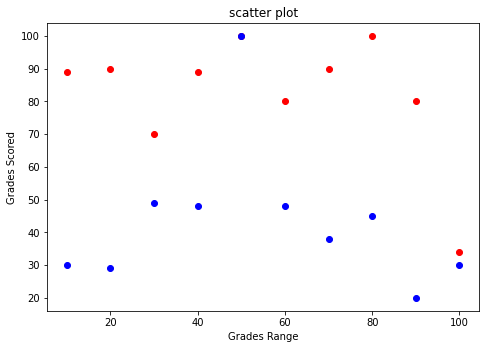

In [2]:
import matplotlib.pyplot as plt
girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(grades_range, girls_grades, color='r')
ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
plt.show()

**Violin Plot**

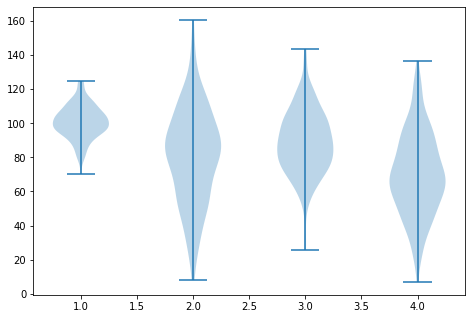

In [3]:
import matplotlib.pyplot as plt

np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

## combine these different collections into a list
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()